<a href="https://colab.research.google.com/github/hpatil000/Data-Mining-Project/blob/main/DataMining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/DataMiningColabNandini/

/content/drive/My Drive/Colab Notebooks/DataMiningColabNandini


DATA IMPORT

In [ ]:
missing_values = ["?"]
features = ['ID number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 
                     'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 
                     'Normal Nucleoli', 'Mitoses', 'Class']
df =  pd.read_csv('./breast-cancer-wisconsin.csv', names = features, delimiter = ',', na_values = missing_values)

In [ ]:
df.head()

,ID number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [ ]:
df.shape

(699, 11)

DATA PREPROCESSING

In [ ]:
pd.isnull(df).sum()

ID number                       0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [ ]:
df.apply(lambda col: col.unique())

ID number                      [1000025, 1002945, 1015425, 1016277, 1017023, ...
Clump Thickness                                  [5, 3, 6, 4, 8, 1, 2, 7, 10, 9]
Uniformity of Cell Size                          [1, 4, 8, 10, 2, 3, 7, 5, 6, 9]
Uniformity of Cell Shape                         [1, 4, 8, 10, 2, 3, 5, 6, 7, 9]
Marginal Adhesion                                [1, 5, 3, 8, 10, 4, 6, 2, 9, 7]
Single Epithelial Cell Size                      [2, 7, 3, 1, 6, 4, 5, 8, 10, 9]
Bare Nuclei                    [1.0, 10.0, 2.0, 4.0, 3.0, 9.0, 7.0, nan, 5.0,...
Bland Chromatin                                  [3, 9, 1, 2, 4, 5, 7, 8, 6, 10]
Normal Nucleoli                                  [1, 2, 7, 4, 5, 3, 10, 6, 9, 8]
Mitoses                                             [1, 5, 4, 2, 3, 7, 10, 8, 6]
Class                                                                     [2, 4]
dtype: object

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(691, 11)

In [ ]:
cat_header = ['Count', '% Miss', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %']

cat_df = pd.DataFrame(index=features, columns=cat_header)
cat_df.index.name = 'Feature_Name'
columns = df[features]

count = columns.count()
cat_df[cat_header[0]] = columns.count()

missing = columns.isna()
cat_df[cat_header[1]] = round((missing.sum() / len(columns)) * 100, 1)

cat_df[cat_header[2]] = columns.nunique()

amount = len(features)
mode_f = [''] * amount
modes = [''] * amount
modes_2 = [''] * amount
mode_p = [''] * amount
mode_f2 = [''] * amount
mode_p2 = [''] * amount
    
for col in columns:
    values = columns[col].value_counts()
    index = features.index(col)
    
    mode = values.index[0]
    modes[index] = mode

    mode_count = values.loc[mode]
    mode_f[index] = mode_count
    
    mode_per = (mode_count/(count[index])) * 100
    mode_p[index] = round(mode_per, 1)
    
    mode_2 = values.index[1]
    modes_2[index] = mode_2
    
    mode_count2 = values.loc[mode_2]
    mode_f2[index] = mode_count2
    
    mode_per2 = (mode_count2/(count[index]))*100
    mode_p2[index] = round(mode_per2, 1)
    
cat_df[cat_header[3]] = modes
cat_df[cat_header[4]] = mode_f
cat_df[cat_header[5]] = mode_p
cat_df[cat_header[6]] = modes_2
cat_df[cat_header[7]] = mode_f2
cat_df[cat_header[8]] = mode_p2

cat_df

,Count,% Miss,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
Feature_Name,,,,,,,,,
ID number,691,0.0,645,1182404.0,6,0.9,1276091.0,5,0.7
Clump Thickness,691,0.0,10,1.0,142,20.5,5.0,129,18.7
Uniformity of Cell Size,691,0.0,10,1.0,379,54.8,10.0,65,9.4
Uniformity of Cell Shape,691,0.0,10,1.0,348,50.4,2.0,59,8.5
Marginal Adhesion,691,0.0,10,1.0,401,58.0,3.0,58,8.4
Single Epithelial Cell Size,691,0.0,10,2.0,383,55.4,3.0,71,10.3
Bare Nuclei,675,2.3,10,1.0,397,58.8,10.0,130,19.3
Bland Chromatin,691,0.0,10,2.0,165,23.9,3.0,161,23.3
Normal Nucleoli,691,0.0,10,1.0,437,63.2,10.0,61,8.8


In [ ]:
df.iloc[23]

ID number                      1057013.0
Clump Thickness                      8.0
Uniformity of Cell Size              4.0
Uniformity of Cell Shape             5.0
Marginal Adhesion                    1.0
Single Epithelial Cell Size          2.0
Bare Nuclei                          NaN
Bland Chromatin                      7.0
Normal Nucleoli                      3.0
Mitoses                              1.0
Class                                4.0
Name: 23, dtype: float64

In [ ]:
df1 = df.fillna(1)
df1.iloc[23]

ID number                      1057013.0
Clump Thickness                      8.0
Uniformity of Cell Size              4.0
Uniformity of Cell Shape             5.0
Marginal Adhesion                    1.0
Single Epithelial Cell Size          2.0
Bare Nuclei                          1.0
Bland Chromatin                      7.0
Normal Nucleoli                      3.0
Mitoses                              1.0
Class                                4.0
Name: 23, dtype: float64

In [ ]:
df.head(10)

,ID number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


DATA VISUALIZATION

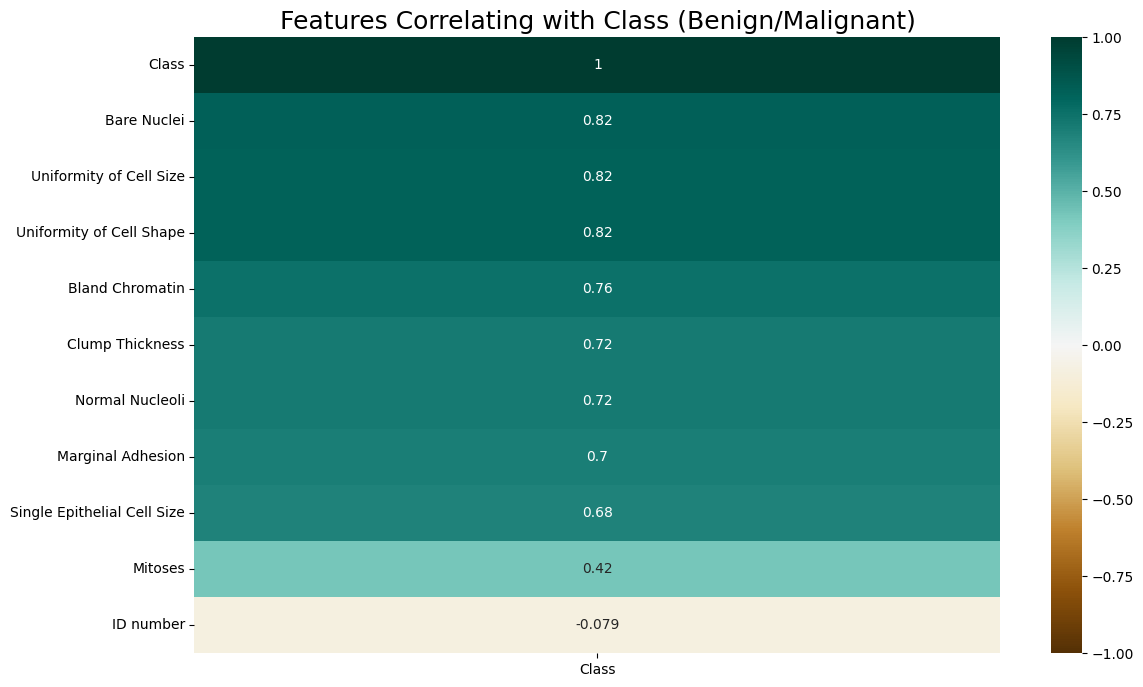

In [ ]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df.corr()[['Class']].sort_values(by='Class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Class', fontdict={'fontsize':16});

In [ ]:
df2 = df1.copy()
df_numerical = df2.astype('float')

In [ ]:
df_numerical.dtypes

ID number                      float64
Clump Thickness                float64
Uniformity of Cell Size        float64
Uniformity of Cell Shape       float64
Marginal Adhesion              float64
Single Epithelial Cell Size    float64
Bare Nuclei                    float64
Bland Chromatin                float64
Normal Nucleoli                float64
Mitoses                        float64
Class                          float64
dtype: object

In [ ]:
df_numerical.head(10)

,ID number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
5,1017122.0,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,4.0
6,1018099.0,1.0,1.0,1.0,1.0,2.0,10.0,3.0,1.0,1.0,2.0
7,1018561.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
8,1033078.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,2.0
9,1033078.0,4.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(df_numerical, df_numerical["Class"], 
                                                                test_size=0.25, train_size = 0.75, random_state=0)

In [ ]:
x = df_numerical.iloc[:,0:10] 
Y = df_numerical.iloc[:,-1] 

In [ ]:
X = x.drop(['ID number', 'Clump Thickness','Marginal Adhesion', 'Single Epithelial Cell Size', 'Mitoses'], axis=1)
X.head(3)

,Uniformity of Cell Size,Uniformity of Cell Shape,Bare Nuclei,Bland Chromatin,Normal Nucleoli
0,1.0,1.0,1.0,3.0,1.0
1,4.0,4.0,10.0,3.0,2.0
2,1.0,1.0,2.0,3.0,1.0


In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

a_scaled = min_max_scaler.fit_transform(X)
df_scaled = pd.DataFrame(data=a_scaled, columns=X.columns)
df_scaled.head()

,Uniformity of Cell Size,Uniformity of Cell Shape,Bare Nuclei,Bland Chromatin,Normal Nucleoli
0,0.000000,0.000000,0.000000,0.222222,0.000000
1,0.333333,0.333333,1.000000,0.222222,0.111111
2,0.000000,0.000000,0.111111,0.222222,0.000000
3,0.777778,0.777778,0.333333,0.222222,0.666667
4,0.000000,0.000000,0.000000,0.222222,0.000000


SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=1, shuffle=True)
kfold = kf.split(df_scaled, Y)

In [ ]:
from sklearn import svm
svc = svm.SVC()

In [ ]:
scores = []

for k, (train, test) in enumerate(kfold):
    svc.fit(df_scaled.iloc[train, :], Y.iloc[train])
    score = svc.score(df_scaled.iloc[test, :], Y.iloc[test])
    scores.append(score)
    print('Fold: %2d, Accuracy: %.4f' % (k+1, score))
print('\n\nSVM Cross-Validation accuracy: mean: %.4f, std: %.4f ' %(np.mean(scores), np.std(scores)))

Fold:  1, Accuracy: 0.9424
Fold:  2, Accuracy: 0.9493
Fold:  3, Accuracy: 0.9565
Fold:  4, Accuracy: 0.9638
Fold:  5, Accuracy: 0.9783


SVM Cross-Validation accuracy: mean: 0.9581, std: 0.0124 


In [ ]:
x = df_numerical.iloc[:,0:10]
Y = df_numerical.iloc[:,-1]

In [ ]:
X = x.drop(['ID number', 'Clump Thickness','Marginal Adhesion', 'Single Epithelial Cell Size', 'Mitoses'], axis=1)
X.head(3)

,Uniformity of Cell Size,Uniformity of Cell Shape,Bare Nuclei,Bland Chromatin,Normal Nucleoli
0,1.0,1.0,1.0,3.0,1.0
1,4.0,4.0,10.0,3.0,2.0
2,1.0,1.0,2.0,3.0,1.0


In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

a_scaled = min_max_scaler.fit_transform(X) 
df_scaled = pd.DataFrame(data=a_scaled, columns=X.columns)
df_scaled.head()

,Uniformity of Cell Size,Uniformity of Cell Shape,Bare Nuclei,Bland Chromatin,Normal Nucleoli
0,0.000000,0.000000,0.000000,0.222222,0.000000
1,0.333333,0.333333,1.000000,0.222222,0.111111
2,0.000000,0.000000,0.111111,0.222222,0.000000
3,0.777778,0.777778,0.333333,0.222222,0.666667
4,0.000000,0.000000,0.000000,0.222222,0.000000


KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=10)

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=1, shuffle=True)
kfold = kf.split(df_scaled, Y)

In [ ]:
scores = []

for k, (train, test) in enumerate(kfold):
    KNN.fit(df_scaled.iloc[train, :], Y.iloc[train])
    score = KNN.score(df_scaled.iloc[test, :], Y.iloc[test])
    scores.append(score)
    print('Fold: %2d, Accuracy: %.4f' % (k+1, score))
print('\n\nKNN Cross-Validation accuracy: mean: %.4f, std: %.4f ' %(np.mean(scores), np.std(scores)))

Fold:  1, Accuracy: 0.9281
Fold:  2, Accuracy: 0.9493
Fold:  3, Accuracy: 0.9638
Fold:  4, Accuracy: 0.9565
Fold:  5, Accuracy: 0.9710


KNN Cross-Validation accuracy: mean: 0.9537, std: 0.0147 


RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=1, shuffle=True)
kfold = kf.split(X, Y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
scores = []

for k, (train, test) in enumerate(kfold):
    RF_clf.fit(X.iloc[train, :], Y.iloc[train])
    score = RF_clf.score(X.iloc[test, :], Y.iloc[test])
    scores.append(score)
    print('Fold: %2d, Accuracy: %.4f' % (k+1, score))
print('\n\nRF Cross-Validation accuracy: mean: %.4f, std: %.4f ' %(np.mean(scores), np.std(scores)))

Fold:  1, Accuracy: 0.9568
Fold:  2, Accuracy: 0.9565
Fold:  3, Accuracy: 0.9638
Fold:  4, Accuracy: 0.9855
Fold:  5, Accuracy: 0.9638


RF Cross-Validation accuracy: mean: 0.9653, std: 0.0106 


LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=1, shuffle=True)
kfold = kf.split(X, Y)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression()

In [ ]:
scores = []

for k, (train, test) in enumerate(kfold):
    LR_clf.fit(X.iloc[train, :], Y.iloc[train])
    score = LR_clf.score(X.iloc[test, :], Y.iloc[test])
    scores.append(score)
    print('Fold: %2d, Accuracy: %.4f' % (k+1, score))
print('\n\nLogistic Regression Cross-Validation accuracy: mean: %.4f, std: %.4f ' %(np.mean(scores), np.std(scores)))

Fold:  1, Accuracy: 0.9496
Fold:  2, Accuracy: 0.9493
Fold:  3, Accuracy: 0.9565
Fold:  4, Accuracy: 0.9565
Fold:  5, Accuracy: 0.9783


Logistic Regression Cross-Validation accuracy: mean: 0.9580, std: 0.0106 


GAUSSIAN NAIVE BAYES

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=1, shuffle=True)
kfold = kf.split(X, Y)

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_clf=GaussianNB()

In [ ]:
scores = []

for k, (train, test) in enumerate(kfold):
    NB_clf.fit(X.iloc[train, :], Y.iloc[train])
    score = NB_clf.score(X.iloc[test, :], Y.iloc[test])
    scores.append(score)
    print('Fold: %2d, Accuracy: %.4f' % (k+1, score))
print('\n\Gaussian Naive Bayes Cross-Validation accuracy: mean: %.4f, std: %.4f ' %(np.mean(scores), np.std(scores)))

Fold:  1, Accuracy: 0.9424
Fold:  2, Accuracy: 0.9565
Fold:  3, Accuracy: 0.9565
Fold:  4, Accuracy: 0.9638
Fold:  5, Accuracy: 0.9710

\Gaussian Naive Bayes Cross-Validation accuracy: mean: 0.9581, std: 0.0095 


VISUALIZING THE RESULTS

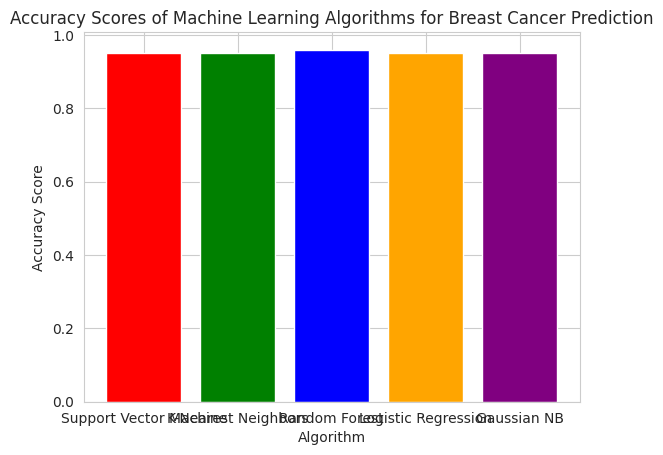

In [ ]:
import matplotlib.pyplot as plt

names = ['Support Vector Machine', 'K-Nearest Neighbors', 'Random Forest', 'Logistic Regression', 'Gaussian NB']
scores = [0.95, 0.95, 0.96, 0.95, 0.95]

colors = ['red', 'green', 'blue', 'orange', 'purple']

plt.bar(names, scores, color = colors)

plt.title('Accuracy Scores of Machine Learning Algorithms for Breast Cancer Prediction')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')

plt.show()

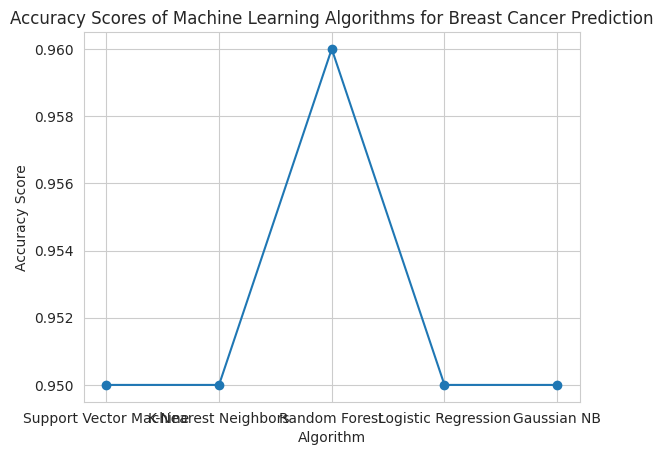

In [ ]:
import matplotlib.pyplot as plt

names = ['Support Vector Machine', 'K-Nearest Neighbors', 'Random Forest', 'Logistic Regression', 'Gaussian NB']
scores = [0.95, 0.95, 0.96, 0.95, 0.95]

plt.plot(names, scores, marker='o')

plt.title('Accuracy Scores of Machine Learning Algorithms for Breast Cancer Prediction')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')

plt.show()